In [137]:
import mysql.connector as mysql
from datetime import datetime
import time
import pandas as pd
import matplotlib.pyplot as plt
import json
import numpy as np

In [138]:
%%javascript
//toggle scrolling for jupyter notebooks.
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [139]:
def getSqlConfigFromJSON(configFileName):
    """
    Loads full mysql connect object from database returns the value as a JSON object. Format of the JSON object 
    is the following:
    
        {
            "host": "hostname.com",
            "port": 99999,
            "user": "root",
            "passwd": "passworkd",
            "database": "database_or_schema_name"
        }
        
    """
    
    with open(configFileName) as f:
        mysqlConnectObject = json.load(f)
        
    return mysqlConnectObject

In [140]:
mysqlConnectObject = getSqlConfigFromJSON('./saraSqlConfig.json')
db = mysql.connect(
    host = mysqlConnectObject["DB_HOST"],
    port = mysqlConnectObject["DB_PORT"],
    user = mysqlConnectObject["DB_USER"],
    passwd = mysqlConnectObject["DB_PASSWORD"],
    database = "HarvardDev"
    )

In [141]:
def get_conc(username = 'mash_aya', num_days = 7):
    cursor = db.cursor()
    sql_command = "SELECT when_inserted, json_answer FROM HarvardDev.harvardSurvey " 
    sql_command = sql_command + "where user_id=\""+username +"\" and when_inserted > NOW() - INTERVAL " + str(num_days) + " DAY "
    sql_command =  sql_command + " order by survey_completion_time desc;"
    print(sql_command)

    cursor.execute(sql_command)
    returnedData = cursor.fetchall()
    conc=[]
    xdates = []
    for row in returnedData:
        date = row[0]
        row_json=json.loads(row[1])
        try:
            conc.append(row_json['Q2'])
            xdates.append(row[0])
        except:
            print(str(date) + " no concentration level")
            
    return conc, xdates
get_conc('mash_aya',30)

SELECT when_inserted, json_answer FROM HarvardDev.harvardSurvey where user_id="mash_aya" and when_inserted > NOW() - INTERVAL 30 DAY  order by survey_completion_time desc;


([' Often',
  ' Often',
  ' Occasionally',
  ' Often',
  ' Often',
  ' Occasionally',
  ' Often',
  ' Often',
  ' Often',
  ' Often',
  ' Often',
  ' Often',
  ' Often',
  ' Often',
  ' Often',
  ' Often',
  ' Often',
  ' Often',
  ' Often',
  ' Often',
  ' Occasionally',
  ' Often',
  ' Often',
  ' Often',
  ' Often',
  ' Often',
  ' Often',
  ' Often',
  ' Often',
  ' Often',
  ' Often',
  ' Often',
  ' Often',
  ' Often',
  ' Often',
  ' Often',
  ' Often',
  ' Often',
  ' Often',
  ' Often',
  ' Often',
  ' Occasionally',
  ' Often',
  ' Often'],
 ['2020-10-14 01:44:48',
  '2020-10-14 01:31:05',
  '2020-10-14 01:18:55',
  '2020-10-14 01:03:58',
  '2020-10-14 01:03:58',
  '2020-10-07 01:31:30',
  '2020-10-07 01:31:28',
  '2020-10-07 01:31:26',
  '2020-10-07 01:31:25',
  '2020-10-07 01:31:23',
  '2020-10-07 01:31:22',
  '2020-10-07 01:31:21',
  '2020-10-07 01:31:19',
  '2020-10-07 01:31:18',
  '2020-10-07 01:31:17',
  '2020-10-07 01:31:16',
  '2020-10-07 01:31:14',
  '2020-10-07 01:3

In [142]:
num_days = 30 #30 days for testing bc the data is funky. change to 7
conc,xdates = get_conc('mash_aya',num_days)
print(len(xdates), len(conc1))


SELECT when_inserted, json_answer FROM HarvardDev.harvardSurvey where user_id="mash_aya" and when_inserted > NOW() - INTERVAL 30 DAY  order by survey_completion_time desc;
44 44


In [143]:
#to_int_arr = ['Rarely/Never', 'Occasionally', 'Often', 'Almost Always/Always']
new_list =[]

def conc_to_int(arr):
    for i in arr:
        if i == ' Rarely/Never':
            new_list.append(1)
        elif i == ' Occasionally':
            new_list.append(2)
        elif i == ' Often':
            new_list.append(3)
        elif i == ' Almost Always/Always':
            new_list.append(4)
    return new_list 


xconc = conc_to_int(conc)
xconc.append(4)
test1 = '2020-10-30 04:33:53'
xdates.append(test1)

In [144]:
#a = set(conc_to_int(conc1))
#b = set(conc_to_int(conc2))

#if a == b:
#    print("Lists conc1 and conc2 are equal")
#else:
#    print("Lists conc1 and conc2 are not equal")


In [148]:
df = pd.DataFrame({'concentration':xconc, 'dates':xdates})
df['short_dates']= df['dates'].str.slice(0,10)
print(df.head(10))

   concentration                dates short_dates
0              3  2020-10-14 01:44:48  2020-10-14
1              3  2020-10-14 01:31:05  2020-10-14
2              2  2020-10-14 01:18:55  2020-10-14
3              3  2020-10-14 01:03:58  2020-10-14
4              3  2020-10-14 01:03:58  2020-10-14
5              2  2020-10-07 01:31:30  2020-10-07
6              3  2020-10-07 01:31:28  2020-10-07
7              3  2020-10-07 01:31:26  2020-10-07
8              3  2020-10-07 01:31:25  2020-10-07
9              3  2020-10-07 01:31:23  2020-10-07


In [153]:
#Eventually when we have good data from daily surveys, just change dates above to last 7 days.
#for now, let's just plot the last 7 data points
df = df.sort_values('dates',ascending=False).head(7)
df = df.sort_values('dates',ascending=True)

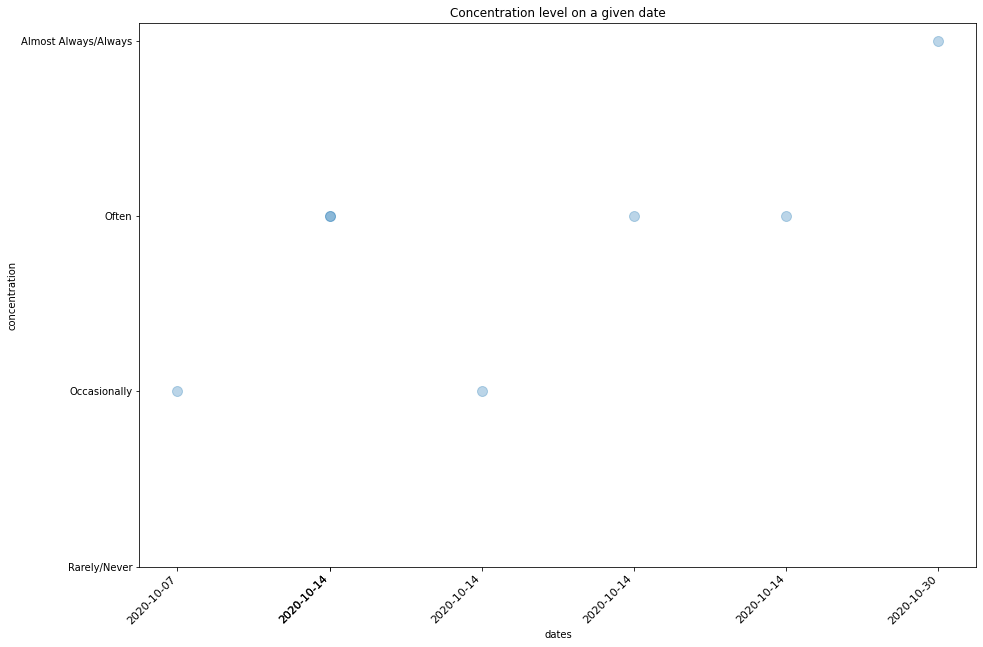

In [160]:
from matplotlib.ticker import MaxNLocator

output = df.plot.scatter(x='dates', y='concentration', figsize = (15,10),alpha=.3,s=100)
plt.xticks(df['dates'],df['short_dates'], fontsize = 11,rotation=45, ha='right')
plt.yticks([1,2,3,4],['Rarely/Never', 'Occasionally', 'Often', 'Almost Always/Always'])
plt.title('Concentration level on a given date')
plt.savefig('concentration.jpg')

In [ ]:
# y_values = ["word 1", "word 2", "word 3", "word 4"]
# y_axis = np.arange(1, 5, 1)

#df.plot.barh('concentration', x_values, align='center')
#plt.yticks(y_axis, y_values)
#plt.show()

In [ ]:
#https://matplotlib.org/3.3.1/tutorials/colors/colormaps.html
#https://matplotlib.org/3.1.0/gallery/color/named_colors.html
# fig, ax = plt.subplots(1, 1, figsize=(10, 5))
# ax.scatter(xconc1,xconc2, alpha=0.3, c=conc_sum,cmap='viridis')
# ax.grid()
# ax.set_facecolor("aliceblue")
# ax.set_title("Concentration for last "+str(num_days)+" days")
# ax.set_xlabel("Conc1")
# ax.set_ylabel("Conc2")
#plt.savefig('conc_'+username+'.jpg')